# Q1. 寫一個函式，抓取 Google Finance 的股價歷史資料

In [18]:
#https://finance.google.com/finance/historical?q=TSLA  歷史股價網址

import requests
%matplotlib inline
!pip install pandas-datareader
# 如果出現 ImportError，需要安裝 pandas-datareader 套件
# pip install pandas-datareader
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO



In [72]:
#HW1 
def stock(stock,startdate) :
    
  url="https://finance.google.com/finance/historical?"
#code startdate 

 
#https://finance.google.com/finance/historical?q=TSLA&startdate=2016-01-01&output=csv
#params[out]="csv"
  stockdata={'q':stock ,'startdate':startdate, 'output':"csv"}

#print(stockdata)
  r = requests.get(url, params=stockdata)
#print(r.url)
#print(r.text)
  r=r.text
  dataframe=StringIO(r)
# sort date
  df = pd.read_csv(dataframe, sep=",")
  df['Date'] =pd.to_datetime(df.Date)
  df=df.sort_values(by='Date')
  print(df.head())
#製圖
  df[['Close','Volume']].plot(subplots = True, figsize = (10, 8))
  plt.legend(loc='best')
#type(df)

          Date    Open    High     Low   Close   Volume
485 2016-01-04  743.00  744.06  731.26  741.84  3258199
484 2016-01-05  746.45  752.00  738.64  742.58  1950691
483 2016-01-06  730.00  747.18  728.92  743.62  1947034
482 2016-01-07  730.31  738.50  719.06  726.39  2963741
481 2016-01-08  731.45  733.23  713.00  714.47  2450857


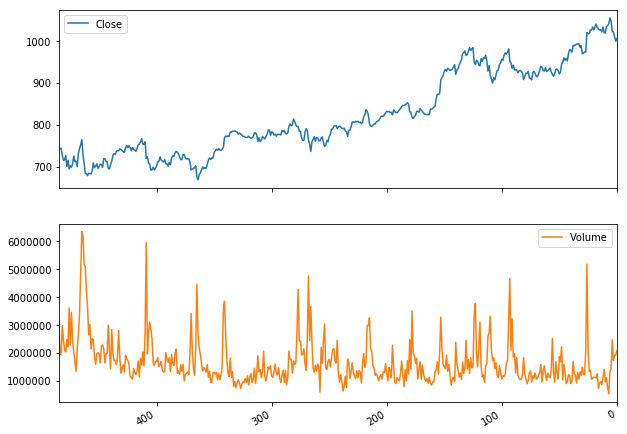

In [73]:
#HW1 function
stock("GOOG","2016-01-01")


# Q2. 抓取台股歷史資料，並繪製價量圖形。

In [95]:
#kchart

import pandas_datareader.data as web
import kchart

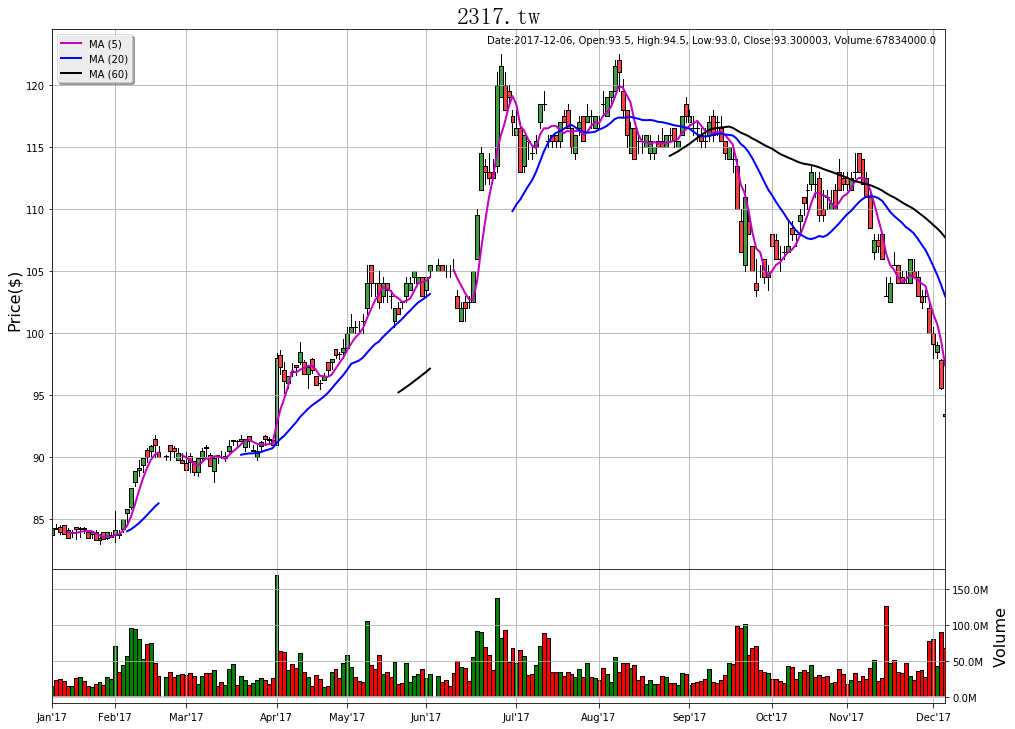

In [117]:
#yahoo twstock
#HW2 

df = web.DataReader("2317.tw", 'yahoo', datetime(2017,1,1))
df.head()
kchart.draw(df,"2317.tw")